# 선형회귀 분석 (Linear Regression Analysis)

<hr>

## ✅선형회귀 분석
- 선형성이라는 기본 가정이 충족된 상태에서 독립변수와 종속변수의 관계를 설명하거나 예측하는 통계 방법
- 회귀분석에서 독립변수에 따라 종속변수의 값이 일정한 패턴으로 변해 가는데, 이러한 변수 간의 관계를 나타내는 회귀선이 직선에 가깝게 나타나는 경우
- 종류
    - 단순회귀분석: 독립변수가 하나인 경우
    - 다중회귀분석: 독립변수가 여러 개인 경우

<br>

$$y=Wx + b$$
- $x$: 독립변수
- $y$: 종속변수
- $X$: 직선의 기울기 (가중치 weight)
- $b$: y절편 (bias)

<br><hr>

## ✅선형회귀 분석의 가설
- **모든 데이터는 선형이다**
- $H(x) = Wx + b$
    - $H$는 Hypothesis, 기울기 $W$는 weight

<br><hr>

## ✅편차 (Deviation)
- 수학 및 통계학에서 편차는 자료값 또는 변량과 평균의 차이를 나타내는 수치
- 편차를 살펴보면 자료들이 **평균을 중심으로 얼마나 퍼져 있는지** 를 알 수 있음
- 자료값이 평균보다 크면 편차는 양의 값을, 평균보다 작으면 음의 값을 가짐
- 편차의 크기는 차이의 크기를 나타냄
- 편차의 절댓값은 **절대편차**, 편차의 제곱은 **제곱편차** 라고 함 

<br><hr>

## ✅용어 정의
- **잔차 (Residual)**
    - 회귀분석에서 종속변수와 적합값(예상값)의 차이
    - 잔차는 **(종속변수 - 적합값)** 으로 정의
- **분산 (Variance)**
    - 편차의 제곱
- **표준 편차 (Standard deviation)**
    - 분산의 제곱근
    
<br><hr>

## ✅잔차를 구하는 방법
- 모든 데이터를 지나는 직선(예측값; e.g. $y=x$)과 실제값의 오차(잔차)를 구하는 방법
    1. **절댓값**
    2. **제곱**
- 대푯값을 만들면 데이터 간의 비교가 가능함
    - e.g. 평균, 최댓값, 최솟값, 중위수, 사분위값
    
<br>

- 잔차의 대푯값을 구하는 방법
    1. 각각의 오차(예측값-실제값)를 제곱 >> 방향성(음수/양수)을 없애기 위함
    2. 제곱한 모든 값의 **평균**을 구해 하나의 대푯값 만들기
        - **Mean Square Error (MSE)**
    3. MSE가 0이 되는 기울기를 찾는 것이 목표
    
<br><hr>

## ✅비용함수 (Cost Function)
- **MSE**를 구하는 방법을 수식화
    - MSE, MAE, RMSE, etc.
$$cost(W, b) = \frac{1}{m}\sum_{i=1}^{m}(H(x^{(i)})-y^{(i)})^2$$
- **cf>** 손실함수
    - 평균을 구하기 전, 값의 수준에서 말하는 값
    - SE (Squared Error)
    - AE (Absolute Error)
    - etc.
- $W$를 변수로 생각하고 식을 전개하면 2차함수의 형태가 나옴
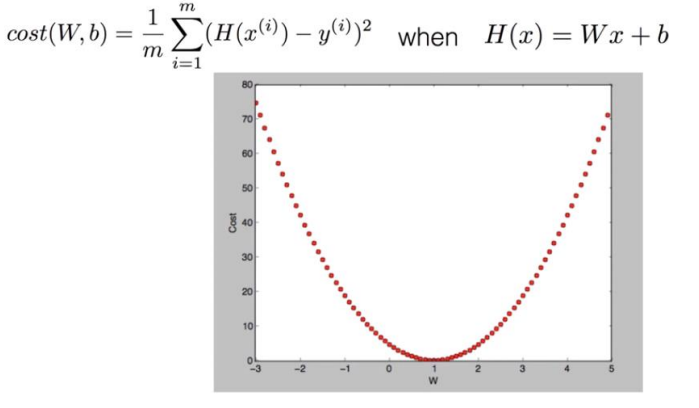

<br><hr>

# 신경망 구현 순서

1. (keras)Sequential 모형 클래스 객체 생성.
2. add 메소드로 레이어(layer) 추가.
   - 입력단부터 순차적으로 추가한다.
   - 레이어는 출력(units) 뉴런 갯수를 첫번째 인수로 받는다.
   - 최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다. 
   - activation 인수로 활성화 함수 설정한다. 
3. compile 메소드로 모형 완성
   - loss 인수로 비용(cost)함수 설정. (비용 == 손실 == 가설 == mse)
   - optimizer 인수로 최적화 알고리즘 설정 (== 경사하강법 알고리즘으로)
   - metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정
4. fit 메소드로 기계학습, 트레이닝
   - epochs로 에포크(epoch) 횟수 설정

In [1]:
# 텐서플로우 설치
# conda install tensorflow

# 텐서플로우 설치 확인
import tensorflow as tf

print(tf.__version__)

2.3.0


In [2]:
# H(x) = wx + b; w = -1, b = 1
x_train = [1., 2., 3., 4.]
y_train = [0., -1., -2., -3.]

In [3]:
# 1. (keras)Sequential 모형 클래스 객체 생성.
## instance 선언
## tf library 이용을 보여주기위해

tf.model = tf.keras.Sequential() ## 변수로 선언해도 괜찮다
tf.model

In [4]:
# 2. add 메소드로 레이어(layer) 추가.

tf.model.add(tf.keras.layers.Dense(units = 1, input_dim = 1, activation = 'linear'))

## dense로 layer 구성
## units = 1 (출력단 y_train으로 한개)
## 신경망 모형을 만드는데 출력은 한개 입력은 한개 전달받고 선형회귀 모델 로 신경망layer 생성

In [5]:
# 3. compile 메소드로 모형 완성
# Stochastic Gradient Decent, 학습률 설정

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
tf.model.compile(loss = 'mse', optimizer = sgd)

In [6]:
# 학습 전 최초 설정된 random weight값 조회

weights = tf.model.layers[0].get_weights()

# 3차원으로 dense 구성

w = weights[0][0][0]
print('초기화 w = '+ str(w))

초기화 w = -0.61686885


In [7]:
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 4. fit 메소드로 기계학습, 트레이닝

tf.model.fit(x_train, y_train, epochs= 200)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1853
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1675
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1546
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1441
Epoch 5/200
1/1 [==============================] - 0s 996us/step - loss: 0.1350
Epoch 6/200
1/1 [==============================] - 0s 0s/step - loss: 0.1267
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1191
Epoch 8/200
1/1 [==============================] - 0s 997us/step - loss: 0.1121
Epoch 9/200
1/1 [==============================] - 0s 0s/step - loss: 0.1054
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0992
Epoch 11/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0933
Epoch 12/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0878
Epoch 13/200
1/1 [==============================] - 0s 997u

1/1 [==============================] - 0s 0s/step - loss: 3.6937e-04
Epoch 103/200
1/1 [==============================] - 0s 0s/step - loss: 3.4759e-04
Epoch 104/200
1/1 [==============================] - 0s 0s/step - loss: 3.2709e-04
Epoch 105/200
1/1 [==============================] - 0s 944us/step - loss: 3.0780e-04
Epoch 106/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8964e-04
Epoch 107/200
1/1 [==============================] - 0s 995us/step - loss: 2.7256e-04
Epoch 108/200
1/1 [==============================] - 0s 996us/step - loss: 2.5648e-04
Epoch 109/200
1/1 [==============================] - 0s 0s/step - loss: 2.4135e-04
Epoch 110/200
1/1 [==============================] - 0s 1ms/step - loss: 2.2712e-04
Epoch 111/200
1/1 [==============================] - 0s 996us/step - loss: 2.1372e-04
Epoch 112/200
1/1 [==============================] - 0s 996us/step - loss: 2.0112e-04
Epoch 113/200
1/1 [==============================] - 0s 504us/step - loss: 1.8925e-0

1/1 [==============================] - 0s 0s/step - loss: 1.0788e-06
Epoch 199/200
1/1 [==============================] - 0s 0s/step - loss: 1.0150e-06
Epoch 200/200
1/1 [==============================] - 0s 997us/step - loss: 9.5522e-07


In [9]:
# 학습을 통해 구한 w와 b의 값
weights = tf.model.layers[0].get_weights()
print('학습 후 : '+ str(weights))

학습 후 : [array([[-0.99921095]], dtype=float32), array([0.99768007], dtype=float32)]


In [10]:
# 예측
import numpy as np
y_predict = tf.model.predict(np.array([5, 6, 7]))
y_predict

array([[-3.9983745],
       [-4.997586 ],
       [-5.9967966]], dtype=float32)

In [ ]:
# 정확도 말고 weight bias를 구하기 위한 일련의과정...